In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
train_data=pd.read_csv('Training.csv')
test_data=pd.read_csv('Testing.csv')
train_data.head(10)
from sklearn.svm import SVC

In [82]:
train_data.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
chills,-0.175905,-0.029324,-0.065917,0.446238,0.295332,1.000000,-0.004688,-0.095646,-0.095646,-0.065917,...,-0.065917,-0.065917,-0.065917,-0.067765,-0.067765,-0.067765,-0.067765,-0.067765,-0.067765,-0.067765
joint_pain,-0.160650,0.171134,-0.060200,-0.087351,-0.060200,-0.004688,1.000000,-0.087351,-0.087351,-0.060200,...,-0.060200,-0.060200,-0.060200,0.359845,0.359845,0.359845,0.359845,-0.061889,-0.061889,-0.061889
stomach_pain,0.202850,0.161784,-0.032566,-0.047254,-0.032566,-0.095646,-0.087351,1.000000,0.433917,0.649078,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
acidity,-0.086906,-0.094786,-0.032566,-0.047254,-0.032566,-0.095646,-0.087351,0.433917,1.000000,0.608981,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
ulcers_on_tongue,-0.059893,-0.065324,-0.022444,-0.032566,-0.022444,-0.065917,-0.060200,0.649078,0.608981,1.000000,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073


In [83]:
train_data.info()
train_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


(4920, 133)

In [84]:
train_data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
train_data.dtypes


itching                            int64
skin_rash                          int64
nodal_skin_eruptions               int64
continuous_sneezing                int64
shivering                          int64
chills                             int64
joint_pain                         int64
stomach_pain                       int64
acidity                            int64
ulcers_on_tongue                   int64
muscle_wasting                     int64
vomiting                           int64
burning_micturition                int64
spotting_ urination                int64
fatigue                            int64
weight_gain                        int64
anxiety                            int64
cold_hands_and_feets               int64
mood_swings                        int64
weight_loss                        int64
restlessness                       int64
lethargy                           int64
patches_in_throat                  int64
irregular_sugar_level              int64
cough           

In [86]:
train_data.isnull().sum()

itching                           0
skin_rash                         0
nodal_skin_eruptions              0
continuous_sneezing               0
shivering                         0
chills                            0
joint_pain                        0
stomach_pain                      0
acidity                           0
ulcers_on_tongue                  0
muscle_wasting                    0
vomiting                          0
burning_micturition               0
spotting_ urination               0
fatigue                           0
weight_gain                       0
anxiety                           0
cold_hands_and_feets              0
mood_swings                       0
weight_loss                       0
restlessness                      0
lethargy                          0
patches_in_throat                 0
irregular_sugar_level             0
cough                             0
high_fever                        0
sunken_eyes                       0
breathlessness              

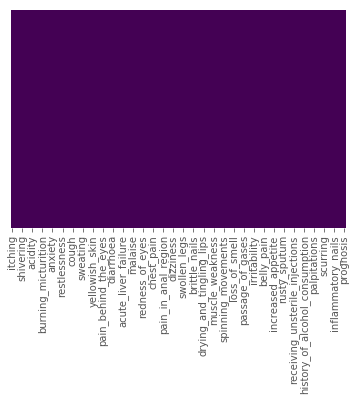

In [87]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


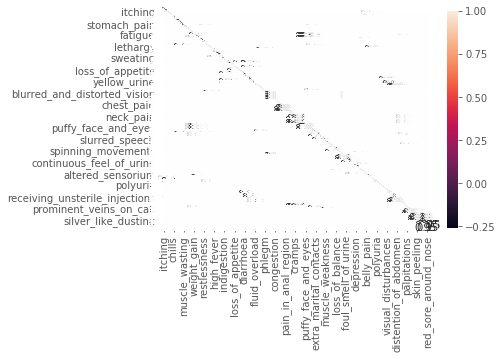

In [88]:
sns.heatmap(train_data.corr(), annot=True)

[Text(0,0,'Fungal infection'),
 Text(0,0,'Allergy'),
 Text(0,0,'GERD'),
 Text(0,0,'Chronic cholestasis'),
 Text(0,0,'Drug Reaction'),
 Text(0,0,'Peptic ulcer diseae'),
 Text(0,0,'AIDS'),
 Text(0,0,'Diabetes '),
 Text(0,0,'Gastroenteritis'),
 Text(0,0,'Bronchial Asthma'),
 Text(0,0,'Hypertension '),
 Text(0,0,'Migraine'),
 Text(0,0,'Cervical spondylosis'),
 Text(0,0,'Paralysis (brain hemorrhage)'),
 Text(0,0,'Jaundice'),
 Text(0,0,'Malaria'),
 Text(0,0,'Chicken pox'),
 Text(0,0,'Dengue'),
 Text(0,0,'Typhoid'),
 Text(0,0,'hepatitis A'),
 Text(0,0,'Hepatitis B'),
 Text(0,0,'Hepatitis C'),
 Text(0,0,'Hepatitis D'),
 Text(0,0,'Hepatitis E'),
 Text(0,0,'Alcoholic hepatitis'),
 Text(0,0,'Tuberculosis'),
 Text(0,0,'Common Cold'),
 Text(0,0,'Pneumonia'),
 Text(0,0,'Dimorphic hemmorhoids(piles)'),
 Text(0,0,'Heart attack'),
 Text(0,0,'Varicose veins'),
 Text(0,0,'Hypothyroidism'),
 Text(0,0,'Hyperthyroidism'),
 Text(0,0,'Hypoglycemia'),
 Text(0,0,'Osteoarthristis'),
 Text(0,0,'Arthritis'),
 Text

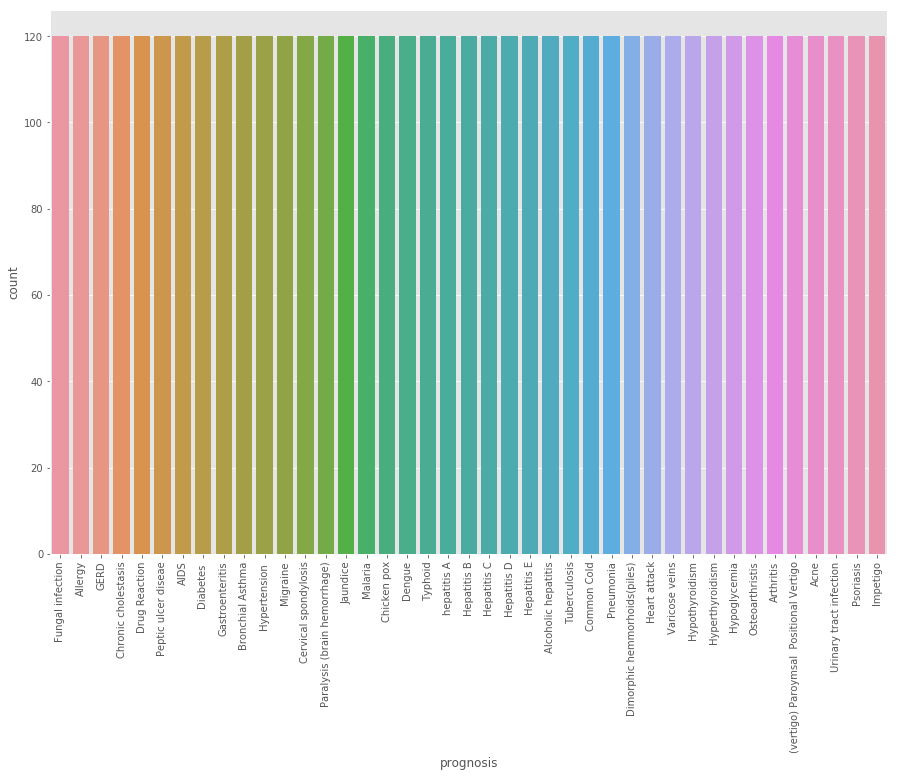

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
chart=sns.countplot(train_data['prognosis'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


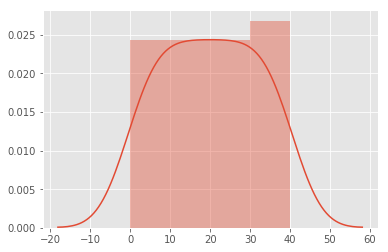

In [90]:
diseases=np.unique(train_data['prognosis'].values)
disease=[i for i in range(diseases.shape[0])]
sns.distplot(disease)

In [91]:
X=train_data.drop('prognosis',axis=1)


132
132


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


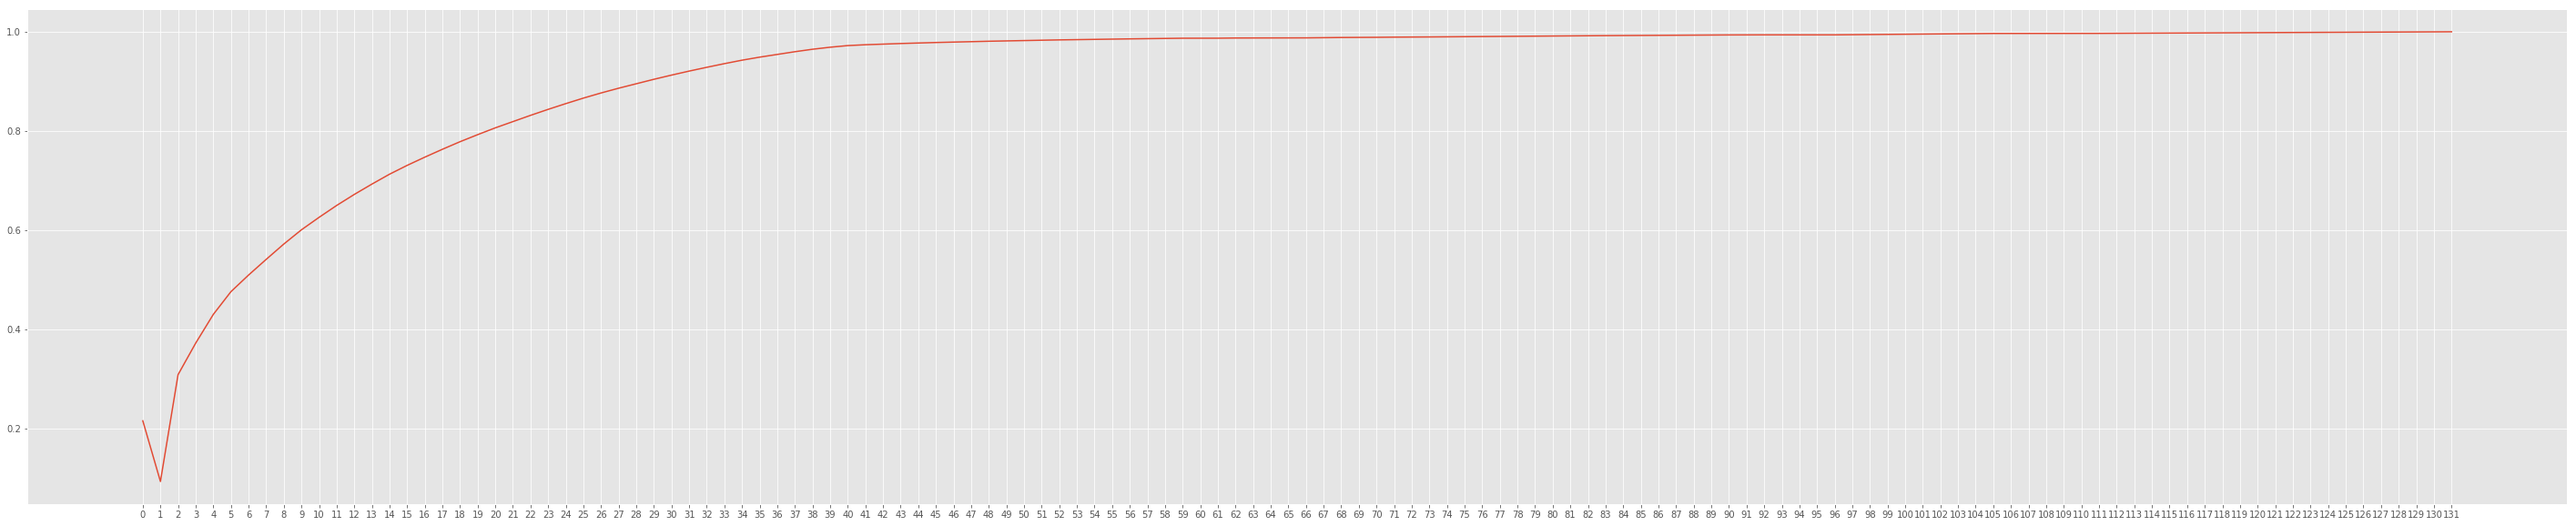

(132, 132)


In [92]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler
def calculate_centered_matrix(x):
  col=None
  for cols in zip(*x):
    if col is None:
      col=(cols-np.mean(cols))
    else:
      col1=(cols-np.mean(cols))
      col=np.vstack((col,col1))
  col=col.T
  S=np.dot(col,col.T)/x.shape[0]
  return S
S=np.dot(X.T,X)
#print(S)
eign_value,eign_vect=LA.eig(S)
print(len(eign_value))
eig_sort=np.argsort(eign_value)[::-1]
eig_vect_sort=None
for i in eig_sort:
   if eig_vect_sort is None:
     eig_vect_sort=eign_vect[i]
   else:
     eig_vect_sort=np.vstack((eig_vect_sort,eign_vect[i]))
eig_vect_sort=eig_vect_sort.T 
S_=np.dot(S,eig_vect_sort)
#print(S_)
propotion_variance=[]
c=0
s=0
for v in eign_value:
      f=v
      if(c==0 or c==1):
       #print(v/sum(eign_value))
       propotion_variance.append(f/sum(eign_value))
      else:
        #print(s/sum(eign_value))
        propotion_variance.append(s/sum(eign_value))
      s=s+f
      c+=1
print(len(propotion_variance))
plt.figure(figsize=(50,10))
import matplotlib.pyplot as plt
cols=[i for i in range(len(eign_value))]
plt.plot(cols, propotion_variance)
plt.xticks(cols)
plt.show()
print(eig_vect_sort.shape)

In [93]:
X_train=train_data.drop(['prognosis'],axis=1)
X_test=test_data.drop('prognosis',axis=1)
Y_train=train_data['prognosis']
Y_test=test_data['prognosis']


In [94]:
svm=SVC(kernel='linear')
svm.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [95]:
Y_pred=svm.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [97]:
cm

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

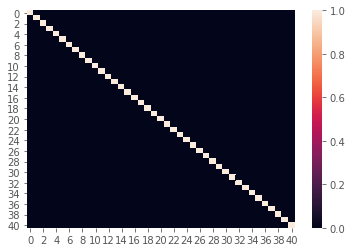

In [98]:
sns.heatmap(cm)

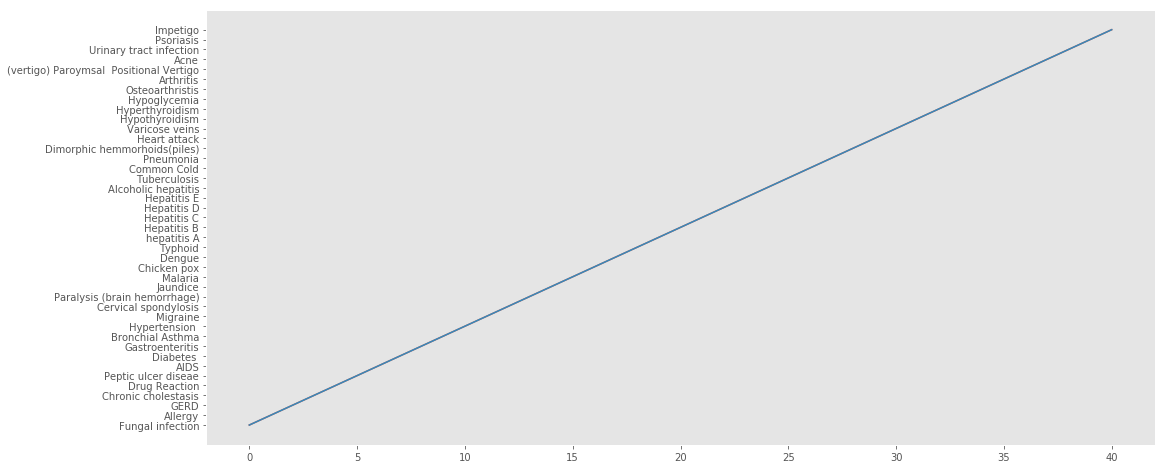

In [99]:
plt.figure(figsize=(17, 8))
plt.plot(Y_test)
plt.plot(Y_pred)
plt.grid(False)
plt.show()

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split

In [101]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.33, random_state=42)

In [102]:
mnb = MultinomialNB()
mnb = mnb.fit(x_train, y_train)

In [103]:
mnb.score(x_test, y_test)

1.0

In [104]:
from sklearn import cross_validation
print ("cross result========")
scores = cross_validation.cross_val_score(mnb, x_test, y_test,cv=2)
print (scores)
print (scores.mean())

cross result========
[0.99756098 1.        ]
0.998780487804878


In [105]:
scores = cross_validation.cross_val_score(mnb, x_test, y_test,cv=3)
print (scores)
print (scores.mean())

[1. 1. 1.]
1.0


Testing with outside the dataset data "Training.csv"

In [106]:
mnb.score(X_test, Y_test)

1.0